# Hand written digit classification

In [23]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

### Network Trained on 60,000 examples (Baseline)

In [24]:
(_x_train, _y_train), (_x_test, _y_test) = mnist.load_data()

In [25]:
x_train = _x_train.reshape(60000, 784).astype("float32") / 255
x_test = _x_test.reshape(10000, 784).astype("float32") / 255

y_train = keras.utils.to_categorical(_y_train, 10)
y_test = keras.utils.to_categorical(_y_test, 10)

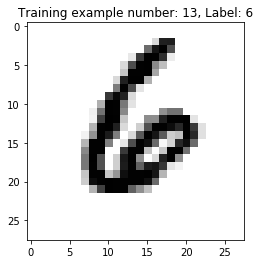

In [26]:
def display_sample(num, inverted=False):
    digit = x_train[num].reshape(28,28)
    if inverted:
        digit = inverted_x_train[num].reshape(28,28)
    plt.figure()
    plt.title(f"Training example number: {num}, Label: {y_train[num].argmax(axis=0)}")
    plt.imshow(digit, cmap = plt.get_cmap("gray_r"))
    plt.show()

display_sample(13)

In [27]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

In [30]:
history = model.fit(x_train,y_train,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2423 - acc: 0.9289 - val_loss: 0.1158 - val_acc: 0.9652
Epoch 2/10
 - 6s - loss: 0.0971 - acc: 0.9710 - val_loss: 0.0869 - val_acc: 0.9716
Epoch 3/10
 - 6s - loss: 0.0654 - acc: 0.9804 - val_loss: 0.0722 - val_acc: 0.9774
Epoch 4/10
 - 5s - loss: 0.0477 - acc: 0.9862 - val_loss: 0.0675 - val_acc: 0.9794
Epoch 5/10
 - 5s - loss: 0.0361 - acc: 0.9888 - val_loss: 0.0728 - val_acc: 0.9784
Epoch 6/10
 - 5s - loss: 0.0285 - acc: 0.9911 - val_loss: 0.0734 - val_acc: 0.9779
Epoch 7/10
 - 5s - loss: 0.0215 - acc: 0.9936 - val_loss: 0.0706 - val_acc: 0.9809
Epoch 8/10
 - 5s - loss: 0.0166 - acc: 0.9954 - val_loss: 0.0719 - val_acc: 0.9811
Epoch 9/10
 - 5s - loss: 0.0131 - acc: 0.9959 - val_loss: 0.0722 - val_acc: 0.9821
Epoch 10/10
 - 5s - loss: 0.0097 - acc: 0.9970 - val_loss: 0.0738 - val_acc: 0.9804


In [31]:
score = model.evaluate(x_test,y_test,verbose=0)
print(f"Test Loss: {score[0]}\nTest Accuracy: {score[1] * 100}%")

Test Loss: 0.07375666370040089
Test Accuracy: 98.04%


### Network trained on 1000 training examples

In [32]:
(_x_train, _y_train), (_x_test, _y_test) = mnist.load_data()

In [33]:
x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:1000,:]
x_test = _x_test.reshape(10000, 784).astype("float32") / 255

y_train = keras.utils.to_categorical(_y_train, 10)[:1000,:]
y_test = keras.utils.to_categorical(_y_test, 10)

print(f"x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}\nx_test shape: {x_test.shape}\ny_test shape: {y_test.shape}\n")

x_train shape: (1000, 784)
y_train shape: (1000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)



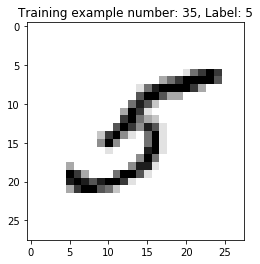

In [34]:
display_sample(35)

In [35]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

In [36]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [37]:
history = model.fit(x_train, y_train,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data=(x_test,y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 1.2214 - acc: 0.6620 - val_loss: 0.7132 - val_acc: 0.8158
Epoch 2/10
 - 0s - loss: 0.5151 - acc: 0.8900 - val_loss: 0.5397 - val_acc: 0.8495
Epoch 3/10
 - 0s - loss: 0.3854 - acc: 0.9000 - val_loss: 0.5096 - val_acc: 0.8484
Epoch 4/10
 - 0s - loss: 0.2841 - acc: 0.9380 - val_loss: 0.4412 - val_acc: 0.8644
Epoch 5/10
 - 0s - loss: 0.2302 - acc: 0.9510 - val_loss: 0.4055 - val_acc: 0.8769
Epoch 6/10
 - 0s - loss: 0.1875 - acc: 0.9590 - val_loss: 0.4538 - val_acc: 0.8540
Epoch 7/10
 - 0s - loss: 0.1522 - acc: 0.9770 - val_loss: 0.4140 - val_acc: 0.8701
Epoch 8/10
 - 0s - loss: 0.1213 - acc: 0.9780 - val_loss: 0.4676 - val_acc: 0.8536
Epoch 9/10
 - 0s - loss: 0.0913 - acc: 0.9860 - val_loss: 0.3654 - val_acc: 0.8899
Epoch 10/10
 - 0s - loss: 0.0767 - acc: 0.9900 - val_loss: 0.4291 - val_acc: 0.8689


In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}\nTest Accuracy: {score[1] * 100}%")

Test loss: 0.42913979527950286
Test Accuracy: 86.89%


In [39]:
probabilities = model.predict(x_train, batch_size=100, verbose=0)
print(probabilities[0])
probabilities.shape

[3.0211819e-05 3.0772047e-05 3.0976891e-05 2.5470024e-02 4.1085366e-07
 9.7408122e-01 5.8363128e-07 8.9244801e-05 2.2881337e-04 3.7733276e-05]


(1000, 10)

### Network trained on 1000 training examples (Inverted images)

In [40]:
(_x_train, _y_train),(_x_test, _y_test) = mnist.load_data()

In [41]:
inverted_x_train = (255 - _x_train.reshape(60000, 784).astype("float32"))[:1000,:] / 255
inverted_x_test = (255 - _x_test.reshape(10000,784).astype("float32")) / 255

inverted_y_train = keras.utils.to_categorical(_y_train, 10)[:1000,:]
inverted_y_test = keras.utils.to_categorical(_y_test, 10)

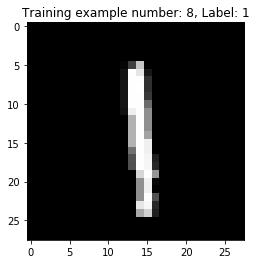

In [42]:
display_sample(8, True)

In [43]:
inverted_model = Sequential()
inverted_model.add(Dense(512, activation="relu", input_shape=(784,)))
inverted_model.add(Dense(10, activation="softmax"))

In [44]:
inverted_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=RMSprop())

In [45]:
inverted_history = inverted_model.fit(inverted_x_train, inverted_y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(inverted_x_test, inverted_y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 6.3059 - acc: 0.1490 - val_loss: 4.9929 - val_acc: 0.2611
Epoch 2/10
 - 0s - loss: 3.4103 - acc: 0.2790 - val_loss: 2.1348 - val_acc: 0.1804
Epoch 3/10
 - 0s - loss: 1.8533 - acc: 0.4000 - val_loss: 2.1704 - val_acc: 0.3030
Epoch 4/10
 - 0s - loss: 1.7130 - acc: 0.4810 - val_loss: 1.4995 - val_acc: 0.4898
Epoch 5/10
 - 0s - loss: 1.6117 - acc: 0.5080 - val_loss: 1.3557 - val_acc: 0.5208
Epoch 6/10
 - 0s - loss: 1.3630 - acc: 0.5790 - val_loss: 1.3590 - val_acc: 0.6396
Epoch 7/10
 - 0s - loss: 1.2930 - acc: 0.6030 - val_loss: 1.2537 - val_acc: 0.6688
Epoch 8/10
 - 0s - loss: 1.1771 - acc: 0.6460 - val_loss: 1.3496 - val_acc: 0.5898
Epoch 9/10
 - 0s - loss: 1.1444 - acc: 0.6200 - val_loss: 1.2857 - val_acc: 0.6748
Epoch 10/10
 - 0s - loss: 0.9660 - acc: 0.7060 - val_loss: 0.9548 - val_acc: 0.6927


In [1]:
inverted_score = inverted_model.evaluate(inverted_x_test, inverted_y_test, verbose=0)
print(f"Test score: {inverted_score[0]}\nTest accuracy: {inverted_score[1] * 100}%")

NameError: name 'inverted_model' is not defined

In [47]:
inverted_probabilities = inverted_model.predict(inverted_x_train, batch_size=100, verbose=0)
print(sum(inverted_probabilities[0]))
inverted_probabilities.shape

1.0000000342261046


(1000, 10)

### Training a 3rd network on probabilities

In [48]:
def merge_probabilities(original, inverted):
    final = []
    for i in range(len(original)):
        temp = np.concatenate((original[i],inverted[i]), axis=0)
        final.append(temp)
    return final

In [49]:
probs_orig = model.predict(x_test, batch_size=100, verbose=0)
probs_inv = inverted_model.predict(x_test, batch_size=100, verbose=0)

In [50]:
probs_x_train = np.array(merge_probabilities(probabilities, inverted_probabilities))
probs_x_test = np.array(merge_probabilities(probs_orig, probs_inv))
probs_y_train = keras.utils.to_categorical(_y_train,10)[:1000,:]
probs_y_test = keras.utils.to_categorical(_y_test, 10)
print(f"probs_x_train shape: {probs_x_train.shape}\nprobs_y_train shape: {probs_y_train.shape}\nprobs_x_test shape: {probs_x_test.shape}\nprobs_y_test shape: {probs_y_test.shape}\n")

probs_x_train shape: (1000, 20)
probs_y_train shape: (1000, 10)
probs_x_test shape: (10000, 20)
probs_y_test shape: (10000, 10)



In [51]:
probs_model = Sequential()
probs_model.add(Dense(512, activation="relu",input_shape=(20,)))
probs_model.add(Dense(10, activation="softmax"))

In [52]:
probs_model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [53]:
probs_history = probs_model.fit(probs_x_train, probs_y_train,
                               batch_size=100,
                               epochs=10,
                               verbose=2,
                               validation_data=(probs_x_test,probs_y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 1.9801 - acc: 0.8050 - val_loss: 1.9561 - val_acc: 0.8602
Epoch 2/10
 - 0s - loss: 1.4718 - acc: 0.9920 - val_loss: 1.6708 - val_acc: 0.8678
Epoch 3/10
 - 0s - loss: 1.0378 - acc: 0.9910 - val_loss: 1.3918 - val_acc: 0.8682
Epoch 4/10
 - 0s - loss: 0.6873 - acc: 0.9910 - val_loss: 1.1480 - val_acc: 0.8695
Epoch 5/10
 - 0s - loss: 0.4382 - acc: 0.9910 - val_loss: 0.9486 - val_acc: 0.8693
Epoch 6/10
 - 0s - loss: 0.2786 - acc: 0.9900 - val_loss: 0.7987 - val_acc: 0.8689
Epoch 7/10
 - 0s - loss: 0.1810 - acc: 0.9910 - val_loss: 0.6912 - val_acc: 0.8696
Epoch 8/10
 - 0s - loss: 0.1218 - acc: 0.9930 - val_loss: 0.6156 - val_acc: 0.8703
Epoch 9/10
 - 0s - loss: 0.0856 - acc: 0.9930 - val_loss: 0.5679 - val_acc: 0.8712
Epoch 10/10
 - 0s - loss: 0.0634 - acc: 0.9940 - val_loss: 0.5399 - val_acc: 0.8715


In [54]:
probs_score = probs_model.evaluate(probs_x_test,probs_y_test, verbose=0)
print(f"Test score: {probs_score[0]}\nTest accuracy: {probs_score[1]*100}%")

Test score: 0.5399050549507141
Test accuracy: 87.15%
